<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [37]:
#import packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import csv

In [3]:
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [4]:
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [11]:
def region_panel_positions_list(region_coordinates, panel_bed, region_chromosome, region_start, region_stop):
    with open(panel_bed, 'r') as bedfile:
        read_reader = csv.reader(bedfile, delimiter = '\t')  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        region_panel_positions = []

        for row in read_reader:
            if row_count > 2:
                chromosome = row[0]
                start = int(row[1])
                stop = int(row[2])
                if chromosome == region_chromosome:
                    if start <  region_stop and stop > region_start:
                        for k, v in region_coordinates.items():
                            intron_exon_start = v[1]
                            intron_exon_stop = v[2]
                            region = k
                            if start < intron_exon_stop and stop > intron_exon_start:
                                region_panel_positions.append((chromosome, start, stop, region))

            row_count+=1

    return region_panel_positions

In [6]:
def panel_coverage_dict(panel_bed):
    #panel coverage
    with open(panel_bed, 'r') as textfile:
        read_reader = csv.reader(textfile, delimiter = '\t')  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        panel_coverage = {}
        for row in read_reader:
            if row_count > 2:
                chromosome = row[0]
                start = int(row[1]) #start position of that part of the chromosome
                end = int(row[2]) #end position of that part of the chromosome

                if chromosome in panel_coverage.keys():
                    panel_coverage[chromosome].append((start, end))
                else:
                    panel_coverage[chromosome]=([(start, end)])

            row_count+=1

    return panel_coverage

In [13]:
def region_ideogram(region_coordinates, color):
    if color == 'blue':
        color_lookup = {'exon': grey3, 'intron': 'white'}
    if color == 'yellow':
        color_lookup = {'exon': grey3, 'intron': 'white'}
    
    xranges = []
    colors = []
    mid_points = []
    labels = []

    for k, v in region_coordinates.items():
        start = int(v[1])
        stop = int(v[2])
        label = k.split()[1]
        intron_or_exon = v[0]
        width = stop - start
        mid_point = start + (width/2)
        xranges.append((start, width))
        colors.append(color_lookup[intron_or_exon])
        if intron_or_exon == 'exon':

            mid_points.append(mid_point)
            labels.append(label)

    return xranges, [0, 1.0], colors, mid_points, labels

In [19]:
def plot_gene(region_coordinates, ax, region, color):

    xranges, yrange, colors, midpoints, labels = region_ideogram(region_coordinates, color)

    ax.broken_barh(xranges, yrange, facecolors= colors, edgecolor = 'black', alpha = 1.0)

    ax.set_xticks(midpoints)
    ax.set_xticklabels(labels, rotation = 0, fontsize = 12)
    ax.set_yticks([])
    ax.text(-0.013, 0.35, region, transform=ax.transAxes, fontsize = 20, ha = 'right')
    ax.text(-0.013, -0.5, 'exons:', transform=ax.transAxes, fontsize = 16, ha = 'right')
    ax.xaxis.set_tick_params(width=0.8, color = grey3, length = 6, labelsize = 16)

    ax.minorticks_off()

    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    return ax

In [21]:
def plot_regions_targeted_by_panel(chromosome, panel_coverage, ax, y_max):

    regions_covered = panel_coverage[chromosome]

    for positions in regions_covered:
        start_position = positions[0]
        stop_position = positions[1]

        bottom = 0
        top = y_max

        x = [start_position, start_position, stop_position, stop_position]
        y = [bottom, top, top, bottom]
#         ax.fill(x, y, color= '#deebf7', fill = True, alpha = 1.0, linewidth = 1, zorder = 0) #fill in the box with stars
        ax.fill(x, y, color= purple2, fill = True, alpha = 0.6, linewidth = 1, zorder = 0) #fill in the box with stars

    return ax

In [15]:
def read_depths_plot(region_name, region_chromosome, region_start, region_stop, region_coordinates, panel_coverage, strand, color):
    plt.close('all')
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, sharex = True, figsize=(20, 1.5))
    gs = matplotlib.gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[1,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    gs.update(hspace=0.05)

    m_size = 100
    axisfont=15
    titlefont=15
    axislabelfont=15
    exonfont=12

    ax1.plot([region_start, region_stop], [0, 0], color = grey3, lw = 2, linestyle = ':')

    #gene IDEOGRAM
    plot_gene(region_coordinates, ax2, region_name, color)

    #REGIONS COVERED BY PANEL:
    plot_regions_targeted_by_panel(region_chromosome, panel_coverage, ax1, 1)

    # CONFIGURING THE GRAPH APPEARANCE
    #Set the x and y axis limits
    if strand == '+':
        ax1.set_xlim(region_start-500, region_stop+500)
        ax2.set_xlim(region_start-500, region_stop+500)
    if strand == '-':
        ax1.set_xlim(region_stop+500, region_start-500)
        ax2.set_xlim(region_stop+500, region_start-500)
    ax1.set_ylim(0, 1)

    #x-axis ticks
    x1_major_ticks = []
    x1_major_tick_labels = []
    ax1.set_xticks(x1_major_ticks)
    ax1.set_xticklabels(x1_major_tick_labels, fontsize = axisfont)
    ax1.set_yticks(x1_major_ticks)
    ax1.set_yticklabels(x1_major_tick_labels, fontsize = axisfont)

#     ax1.tick_params(axis='y', which='major', labelsize=13)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    for axis in ['left']:
        ax1.spines[axis].set_linewidth(1.5)
        ax1.spines[axis].set_color('#969696')
    ax1.yaxis.set_tick_params(width=1, color = '#969696', length = 6)

    legend_elements = [Line2D([0], [0], marker = 's', color='#deebf7', alpha=1.0, markersize = 12, \
                      lw=0, label='regions covered by custom panel')]
    
    plt.tight_layout()

    return plt.show()

In [9]:
panel_bed = 'Data_files/TWIST_CNV_panel_TE-95031423_h19.bed'
panel_coverage = panel_coverage_dict(panel_bed)

plotting ABL1 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


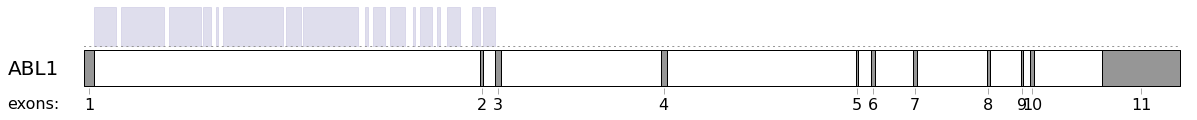

In [24]:
#ABL1
print('plotting ABL1 translocation breakpoint read depths')
ABL1_chromosome = 'chr9'
ABL1_start = 133710453
ABL1_stop = 133763062
ABL1_coordinates = {'Exon 1': ('exon', 133710453, 133710912),
                   'Intron 1-2': ('intron', 133710913, 133729450),
                   'Exon 2': ('exon', 133729451, 133729624),
                   'Intron 2-3': ('intron', 133729625, 133730187),
                   'Exon 3': ('exon', 133730188, 133730483),
                   'Intron 3-4': ('intron', 133730484, 133738149),
                   'Exon 4': ('exon', 133738150, 133738422),
                   'Intron 4-5': ('intron', 133738423, 133747515),
                   'Exon 5': ('exon', 133747516, 133747600),
                   'Intron 5-6': ('intron', 133747601, 133748246),
                   'Exon 6': ('exon', 133748247, 133748424),
                   'Intron 6-7': ('intron', 133748425, 133750254),
                   'Exon 7': ('exon', 133750255, 133750439),
                   'Intron 7-8': ('intron', 133750440, 133753801),
                   'Exon 8': ('exon', 133753802, 133753954),
                   'Intron 8-9': ('intron', 133753955, 133755454),
                   'Exon 9': ('exon', 133755455, 133755544),
                   'Intron 9-10': ('intron', 133755545, 133755886),
                   'Exon 10': ('exon', 133755887, 133756051),
                   'Intron 10-11': ('intron', 133756052, 133759355),
                   'Exon 11': ('exon', 133759356, 133763062)}

color = 'yellow'

ABL1_panel_positions = region_panel_positions_list(ABL1_coordinates, panel_bed, ABL1_chromosome, ABL1_start, ABL1_stop)
ABL1_intron_exon_positions = region_ideogram(ABL1_coordinates, color)
read_depths_plot('ABL1', ABL1_chromosome, ABL1_start, ABL1_stop, ABL1_coordinates, panel_coverage, '+', color)

plotting BCR translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


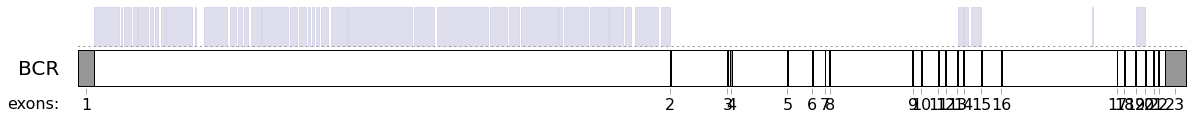

In [25]:
#BCR
print('plotting BCR translocation breakpoint read depths')
BCR_chromosome = 'chr22'
BCR_start = 23522397
BCR_stop = 23660224
BCR_coordinates = {'Exon 1': ('exon', 23522397, 23524426),
                   'Intron 1-2': ('intron', 23524427, 23595985),
                   'Exon 2': ('exon', 23595986, 23596167),
                   'Intron 2-3': ('intron', 23596168, 23603136),
                   'Exon 3': ('exon', 23603137, 23603241),
                   'Intron 3-4': ('intron', 23603242, 23603541),
                   'Exon 4': ('exon', 23603542, 23603727),
                   'Intron 4-5': ('intron', 23603728, 23610594),
                   'Exon 5': ('exon', 23610595, 23610702),
                   'Intron 5-6': ('intron', 23610703, 23613718),
                   'Exon 6': ('exon', 23613719, 23613779),
                   'Intron 6-7': ('intron', 23613780, 23615267),
                   'Exon 7': ('exon', 23615268, 23615320),
                   'Intron 7-8': ('intron', 23615321, 23615820),
                   'Exon 8': ('exon', 23615821, 23615961),
                   'Intron 8-9': ('intron', 23615962, 23626163),
                   'Exon 9': ('exon', 23626164, 23626285),
                   'Intron 9-10': ('intron', 23626286, 23627219),
                   'Exon 10': ('exon', 23627220, 23627388),
                   'Intron 10-11': ('intron', 23627389, 23629345),
                   'Exon 11': ('exon', 23629346, 23629465),
                  'Intron 11-12':('intron', 23629466, 23630283),
                  'Exon 12': ('exon', 23630284, 23630359),
                  'Intron 12-13': ('intron', 23630360, 23631703),
                  'Exon 13': ('exon', 23631704, 23631808),
                  'Intron 13-14': ('intron', 23631809, 23632525),
                  'Exon 14': ('exon', 23632526, 23632600),
                  'Intron 14-15': ('intron', 23632601, 23634727),
                  'Exon 15': ('exon', 23634728, 23634825),
                  'Intron 15-16': ('intron', 23634826, 23637210),
                  'Exon 16': ('exon', 23637211, 23637342),
                  'Intron 16-17': ('intron', 23637343, 23651610),
                  'Exon 17': ('exon', 23651611, 23651670),
                  'Intron 17-18': ('intron', 23651671, 23652510),
                  'Exon 18': ('exon', 23652511, 23652620),
                  'Intron 18-19': ('intron', 23652621, 23653883),
                  'Exon 19': ('exon', 23653884, 23654023),
                  'Intron 19-20': ('intron', 23654024, 23655073),
                  'Exon 20': ('exon', 23655074, 23655208),
                  'Intron 20-21': ('intron', 23655209, 23656154),
                  'Exon 21': ('exon', 23656155, 23656260),
                  'Intron 21-22': ('intron', 23656261, 23656738),
                  'Exon 22': ('exon', 23656739, 23656901),
                  'Intron 22-23': ('intron', 23656902, 23657619),
                  'Exon 23': ('exon', 23657620, 23660224)}

color = 'blue'

BCR_panel_positions = region_panel_positions_list(BCR_coordinates, panel_bed, BCR_chromosome, BCR_start, BCR_stop)
BCR_intron_exon_positions = region_ideogram(BCR_coordinates, color)
read_depths_plot('BCR', BCR_chromosome, BCR_start, BCR_stop, BCR_coordinates, panel_coverage, '+', color)

plotting PML translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


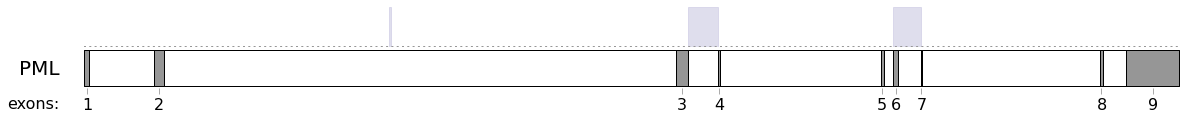

In [26]:
#PML
print('plotting PML translocation breakpoint read depths')
PML_chromosome = 'chr15'
PML_start = 74287058
PML_stop = 74339112
PML_coordinates = {'Exon 1': ('exon', 74287058, 74287282),
                   'Intron 1-2': ('intron', 74287283, 74290344),
                   'Exon 2': ('exon', 74290345, 74290817),
                   'Intron 2-3': ('intron', 74290818, 74315168),
                   'Exon 3': ('exon', 74315169, 74315749),
                   'Intron 3-4': ('intron', 74315750, 74317197),
                   'Exon 4': ('exon', 74317198, 74317268),
                   'Intron 4-5': ('intron', 74317269, 74324912),
                   'Exon 5': ('exon', 74324913, 74325056),
                   'Intron 5-6': ('intron', 74325057, 74325496),
                   'Exon 6': ('exon', 74325497, 74325755),
                   'Intron 6-7': ('intron', 74325756, 74326818),
                   'Exon 7': ('exon', 74326819, 74326871),
                   'Intron 7-8': ('intron', 74326872, 74335329),
                   'Exon 8': ('exon', 74335330, 74335480),
                   'Intron 8-9': ('intron', 74335481, 74336561),
                   'Exon 9': ('exon', 74336562, 74339112)}

color = 'blue'

PML_panel_positions = region_panel_positions_list(PML_coordinates, panel_bed, PML_chromosome, PML_start, PML_stop)
PML_intron_exon_positions = region_ideogram(PML_coordinates, color)
read_depths_plot('PML', PML_chromosome, PML_start, PML_stop, PML_coordinates, panel_coverage, '+', color)

plotting RARA translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


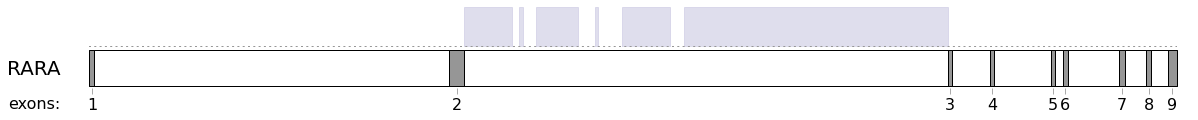

In [27]:
#RARA
print('plotting RARA translocation breakpoint read depths')
RARA_chromosome = 'chr17'
RARA_start = 38474533
RARA_stop = 38512583
RARA_coordinates = {'Exon 1': ('exon', 38474533, 38474700),
                   'Intron 1-2': ('intron', 38474701, 38487108),
                   'Exon 2': ('exon', 38487109, 38487648),
                   'Intron 2-3': ('intron', 38487649, 38504567),
                   'Exon 3': ('exon', 38504568, 38504716),
                   'Intron 3-4': ('intron', 38504717, 38506035),
                   'Exon 4': ('exon', 38506036, 38506177),
                   'Intron 4-5': ('intron', 38506178, 38508161),
                   'Exon 5': ('exon', 38508162, 38508322),
                   'Intron 5-6': ('intron', 38508323, 38508582),
                   'Exon 6': ('exon', 38508583, 38508759),
                   'Intron 6-7': ('intron', 38508760, 38510553),
                   'Exon 7': ('exon', 38510554, 38510758),
                   'Intron 7-8': ('intron', 38510759, 38511514),
                   'Exon 8': ('exon', 38511515, 38511673),
                   'Intron 8-9': ('intron', 38511674, 38512260),
                   'Exon 9': ('exon', 38512261, 38512583)}

color = 'yellow'

RARA_panel_positions = region_panel_positions_list(RARA_coordinates, panel_bed, RARA_chromosome, RARA_start, RARA_stop)
RARA_intron_exon_positions = region_ideogram(RARA_coordinates, color)
read_depths_plot('RARA', RARA_chromosome, RARA_start, RARA_stop, RARA_coordinates, panel_coverage, '+', color)

plotting CBFB translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


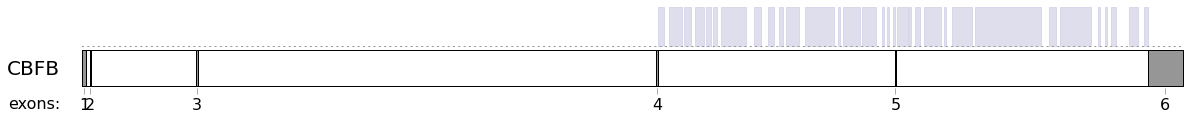

In [28]:
#CBFB
print('plotting CBFB translocation breakpoint read depths')
CBFB_chromosome = 'chr16'
CBFB_start = 67063148
CBFB_stop = 67134925

CBFB_coordinates = {'Exon 1': ('exon', 67063148, 67063388),
                   'Intron 1-2': ('intron', 67063389, 67063629),
                   'Exon 2': ('exon', 67063630, 67063716),
                   'Intron 2-3': ('intron', 67063717, 67070541),
                   'Exon 3': ('exon', 67070542, 67070658),
                   'Intron 3-4': ('intron', 67070659, 67100584),
                   'Exon 4': ('exon', 67100585, 67100701),
                   'Intron 4-5': ('intron', 67100702, 67116115),
                   'Exon 5': ('exon', 67116116, 67116211),
                   'Intron 5-6': ('intron', 67116212, 67132612),
                   'Exon 6': ('exon', 67132613, 67134925)}

color = 'yellow'

CBFB_panel_positions = region_panel_positions_list(CBFB_coordinates, panel_bed, CBFB_chromosome, CBFB_start, CBFB_stop)
CBFB_intron_exon_positions = region_ideogram(CBFB_coordinates, color)
read_depths_plot('CBFB', CBFB_chromosome, CBFB_start, CBFB_stop, CBFB_coordinates, panel_coverage, '+', color)

plotting MYH11 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


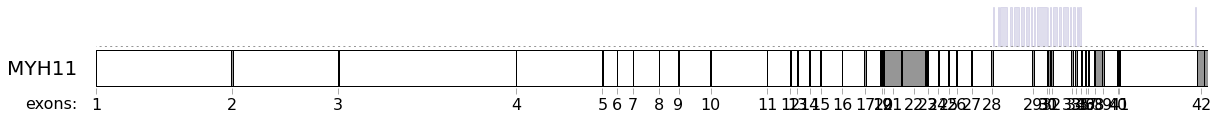

In [29]:
#MYH11
print('plotting MYH11 translocation breakpoint read depths')
MYH11_chromosome = 'chr16'
MYH11_start = 15797029
MYH11_stop = 15950868
MYH11_coordinates = {'Exon 1': ('exon', 15950798, 15950868),
                   'Intron 1-2': ('intron', 15932127, 15950797),
                   'Exon 2': ('exon', 15931765, 15932126),
                   'Intron 2-3': ('intron', 15917269, 15931764),
                   'Exon 3': ('exon', 15917112, 15917268),
                   'Intron 3-4': ('intron', 15892545, 15917111),
                   'Exon 4': ('exon', 15892517, 15892544),
                   'Intron 4-5': ('intron', 15880590, 15892516),
                   'Exon 5': ('exon', 15880487, 15880589),
                   'Intron 5-6': ('intron', 15878576, 15880486),
                   'Exon 6': ('exon', 15878555, 15878575),
                   'Intron 6-7': ('intron', 15876335, 15878554),
                   'Exon 7': ('exon', 15876242, 15876334),
                   'Intron 7-8': ('intron', 15872701, 15876241),
                   'Exon 8': ('exon', 15872637, 15872700),
                   'Intron 8-9': ('intron', 15870034, 15872636),
                   'Exon 9': ('exon', 15869935, 15870033),
                   'Intron 9-10': ('intron', 15865570, 15869934),
                   'Exon 10': ('exon', 15865426, 15865569),
                   'Intron 10-11': ('intron', 15857749, 15865425),
                   'Exon 11': ('exon', 15857653, 15857748),
                  'Intron 11-12':('intron', 15854516, 15857652),
                  'Exon 12': ('exon', 15854397, 15854515),
                  'Intron 12-13': ('intron', 15853586, 15854396),
                  'Exon 13': ('exon', 15853433, 15853585),
                  'Intron 13-14': ('intron', 15851858, 15853432),
                  'Exon 14': ('exon', 15851684, 15851857),
                  'Intron 14-15': ('intron', 15850372, 15851683),
                  'Exon 15': ('exon', 15850198, 15850371),
                  'Intron 15-16': ('intron', 15847366, 15850197),
                  'Exon 16': ('exon', 15847251, 15847365),
                  'Intron 16-17': ('intron', 15844189, 15847250),
                  'Exon 17': ('exon', 15843995, 15844188),
                  'Intron 17-18': ('intron', 15842026, 15843994),
                  'Exon 18': ('exon', 15841904, 1584225),
                  'Intron 18-19': ('intron', 15841801, 15841903),
                  'Exon 19': ('exon', 15841731, 15841800),
                  'Intron 19-20': ('intron', 15841588, 15841730),
                  'Exon 20': ('exon', 15841427, 15841587),
                  'Intron 20-21': ('intron', 15841427, 15841587),
                  'Exon 21': ('exon', 15839095, 15841426),
                  'Intron 21-22': ('intron', 15838986, 15839094),
                  'Exon 22': ('exon', 15835749, 15838985),
                  'Intron 22-23': ('intron', 15835617, 15835748),
                  'Exon 23': ('exon', 15835320, 15835526),
                  'Intron 23-24': ('intron', 15834046, 15835319),
                  'Exon 24': ('exon', 15833908, 15834045),
                  'Intron 24-25': ('intron', 15832546, 15833907),
                  'Exon 25': ('exon', 15832422, 15832545),
                  'Intron 25-26': ('intron', 15831478, 15832421),
                  'Exon 26': ('exon', 15831306, 15831477),
                  'Intron 26-27': ('intron', 15829436, 15831305),
                  'Exon 27': ('exon', 15829223, 15829435),
                  'Intron 27-28': ('intron', 15826566, 15829222),
                  'Exon 28': ('exon', 15826421, 15826565),
                  'Intron 28-29': ('intron', 15820912, 15826420),
                  'Exon 29': ('exon', 15820705, 15820911),
                  'Intron 29-30': ('intron', 15818850, 15820704),
                  'Exon 30': ('exon', 15818745, 15818849),
                  'Intron 30-31': ('intron', 15818657, 15818744),
                  'Exon 31': ('exon', 15818504, 15818656),
                  'Intron 31-32': ('intron', 15818267, 15818503),
                  'Exon 32': ('exon', 15818018, 15818266),
                  'Intron 32-33': ('intron', 15815492, 15818017),
                  'Exon 33': ('exon', 15815279, 15815491),
                  'Intron 33-34': ('intron', 15814909, 15815278),
                  'Exon 34': ('exon', 15814696, 15814908),
                  'Intron 34-35': ('intron', 15814170, 15814695),
                  'Exon 35': ('exon', 15814008, 15814169),
                  'Intron 35-36': ('intron', 15813571, 15814007),
                  'Exon 36': ('exon', 15813442, 15813570),
                  'Intron 36-37': ('intron', 15813166, 15813441),
                  'Exon 37': ('exon', 15813077, 15813165),
                  'Intron 37-38': ('intron', 15812296, 15813076),
                  'Exon 38': ('exon', 15812172, 15812295),
                  'Intron 38-39': ('intron', 15829436, 15831305),
                  'Exon 39': ('exon', 15810997, 15811205),
                  'Intron 39-40': ('intron', 15809130, 15810996),
                  'Exon 40': ('exon', 15809021, 15809129),
                  'Intron 40-41': ('intron', 15808939, 15809020),
                  'Exon 41': ('exon', 15808766, 15808938),
                  'Intron 41-42': ('intron', 15797981, 15808765),
                  'Exon 42': ('exon', 15797029, 15797980)}

color = 'blue'

MYH11_panel_positions = region_panel_positions_list(MYH11_coordinates, panel_bed, MYH11_chromosome, MYH11_start, MYH11_stop)
MYH11_intron_exon_positions = region_ideogram(MYH11_coordinates, color)
read_depths_plot('MYH11', MYH11_chromosome, MYH11_start, MYH11_stop, MYH11_coordinates, panel_coverage, '-', color)

plotting RUNX1 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


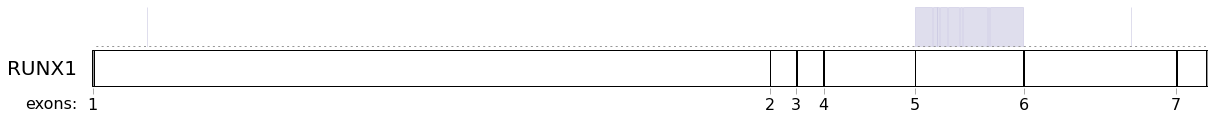

In [30]:
#RUNX1
print('plotting RUNX1 translocation breakpoint read depths')
RUNX1_chromosome = 'chr21'
RUNX1_start = 36164907
RUNX1_stop = 36421139
RUNX1_coordinates = {'Exon 1': ('exon', 36421139, 36421641),
                   'Intron 1-2': ('intron', 36265261, 36421138),
                   'Exon 2': ('exon', 36265222, 36265260),
                   'Intron 2-3': ('intron', 36259394, 36265221),
                   'Exon 3': ('exon', 36259140, 36259393),
                   'Intron 3-4': ('intron', 36253011, 36259139),
                   'Exon 4': ('exon', 36252854, 36253010),
                   'Intron 4-5': ('intron', 36231876, 36252853),
                   'Exon 5': ('exon', 36231771, 36231875),
                   'Intron 5-6': ('intron', 36206899, 36231770),
                   'Exon 6': ('exon', 36206707, 36206898),
                   'Intron 6-7': ('intron', 36171760, 36206706),
                   'Exon 7': ('exon', 36171598, 36171759),
                   'Intron 7-8': ('intron', 36164908, 36171597),
                   'Exon 8': ('exon', 36160098, 36164907)}

color = 'yellow'

RUNX1_panel_positions = region_panel_positions_list(RUNX1_coordinates, panel_bed, RUNX1_chromosome, RUNX1_start, RUNX1_stop)
RUNX1_intron_exon_positions = region_ideogram(RUNX1_coordinates, color)
read_depths_plot('RUNX1', RUNX1_chromosome, RUNX1_start, RUNX1_stop, RUNX1_coordinates, panel_coverage, '-', color)

plotting RUNX1T1 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


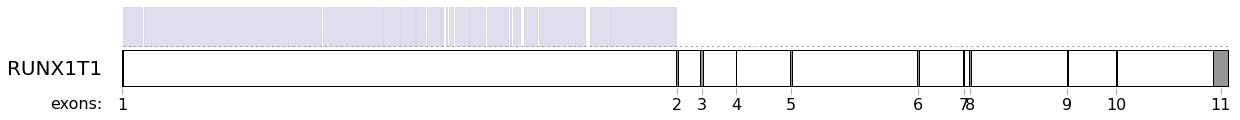

In [31]:
#RUNX1T1
print('plotting RUNX1T1 translocation breakpoint read depths')
RUNX1T1_chromosome = 'chr8'
RUNX1T1_start = 92971152
RUNX1T1_stop = 93088364
RUNX1T1_coordinates = {'Exon 1': ('exon', 93088193, 93088364),
                   'Intron 1-2': ('intron', 93029592, 93088192),
                   'Exon 2': ('exon', 93029454, 93029591),
                   'Intron 2-3': ('intron', 93027049, 93029453),
                   'Exon 3': ('exon', 93026807, 93027048),
                   'Intron 3-4': ('intron', 93023320, 93026806),
                   'Exon 4': ('exon', 93023230, 93023319),
                   'Intron 4-5': ('intron', 93017526, 93023229),
                   'Exon 5': ('exon', 93017344, 93017525),
                   'Intron 5-6': ('intron', 93004118, 93017343),
                   'Exon 6': ('exon', 93003867, 93004117),
                   'Intron 6-7': ('intron', 92999201, 93003866),
                   'Exon 7': ('exon', 92999115, 92999200),
                   'Intron 7-8': ('intron', 92998554, 92999114),
                   'Exon 8': ('exon', 92998352, 92998553),
                     'Intron 8-9': ('intron', 92988202, 92998351),
                     'Exon 9': ('exon', 92988133, 92988201),
                     'Intron 9-10': ('intron', 92983077, 92988132),
                     'Exon 10':  ('exon', 92982886, 92983076),
                     'Intron 10-11': ('intron', 92972746, 92982885),
                     'Exon 11': ('exon', 92971152, 92972745)}

color = 'blue'

RUNX1T1_panel_positions = region_panel_positions_list(RUNX1T1_coordinates, panel_bed, RUNX1T1_chromosome, RUNX1T1_start, RUNX1T1_stop)
RUNX1T1_intron_exon_positions = region_ideogram(RUNX1T1_coordinates, color)
read_depths_plot('RUNX1T1', RUNX1T1_chromosome, RUNX1T1_start, RUNX1T1_stop, RUNX1T1_coordinates, panel_coverage, '-', color)

plotting DEK translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


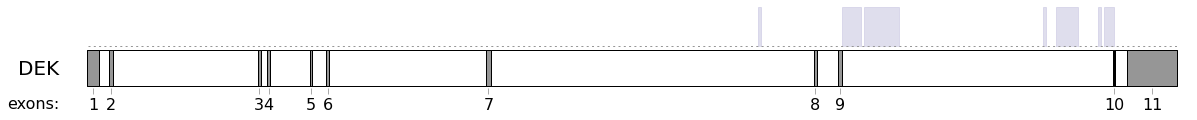

In [32]:
#DEK
print('plotting DEK translocation breakpoint read depths')
DEK_chromosome = 'chr6'
DEK_start = 18224099
DEK_stop = 18265054
DEK_coordinates = {'Exon 1': ('exon', 18264616, 18265054),
                   'Intron 1-2': ('intron', 18264228, 18264615),
                   'Exon 2': ('exon', 18264074, 18264227),
                   'Intron 2-3': ('intron', 18258637, 18264073),
                   'Exon 3': ('exon', 18258535, 18258636),
                   'Intron 3-4': ('intron', 18258294, 18258534),
                   'Exon 4': ('exon', 18258184, 18258293),
                   'Intron 4-5': ('intron', 18256687, 18258183),
                   'Exon 5': ('exon', 18256592, 18256686),
                   'Intron 5-6': ('intron', 18256083, 18256591),
                   'Exon 6': ('exon', 18255962, 18256082),
                   'Intron 6-7': ('intron', 18250071, 18255961),
                   'Exon 7': ('exon', 18249882, 18250070),
                   'Intron 7-8': ('intron', 18237748, 18249881),
                   'Exon 8': ('exon', 18237612, 18237747),
                     'Intron 8-9': ('intron', 18236832, 18237611),
                     'Exon 9': ('exon', 18236683, 18236831),
                     'Intron 9-10': ('intron', 18226474, 18236682),
                     'Exon 10':  ('exon', 18226405, 18226473),
                     'Intron 10-11': ('intron', 18225962, 18226404),
                     'Exon 11': ('exon', 18224099, 18225961)}

color = 'blue'

DEK_panel_positions = region_panel_positions_list(DEK_coordinates, panel_bed, DEK_chromosome, DEK_start, DEK_stop)
DEK_intron_exon_positions = region_ideogram(DEK_coordinates, color)
read_depths_plot('DEK', DEK_chromosome, DEK_start, DEK_stop, DEK_coordinates, panel_coverage, '-', color)

plotting NUP214 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


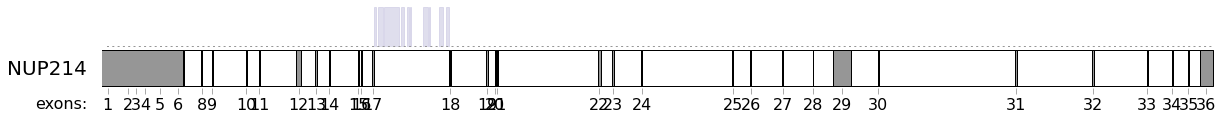

In [33]:
#NUP214
print('plotting NUP214 translocation breakpoint read depths')
NUP214_chromosome = 'chr9'
NUP214_start = 134000948
NUP214_stop = 134110057
NUP214_coordinates = {'Exon 1': ('exon', 134000948, 134001136),
                   'Intron 1-2': ('intron', 134001137, 134002910),
                   'Exon 2': ('exon', 134002911, 134003106),
                   'Intron 2-3': ('intron', 134003107, 134003718),
                   'Exon 3': ('exon', 134003719, 134003870),
                   'Intron 3-4': ('intron', 134003871, 134004665),
                   'Exon 4': ('exon', 134004666, 134004864),
                   'Intron 4-5': ('intron', 134004865, 134006152),
                   'Exon 5': ('exon', 134006153, 134006223),
                   'Intron 5-6': ('intron', 134006224 ,134007982),
                   'Exon 6': ('exon', 134007983, 134008046),
                   'Intron 6-7': ('intron', 134008047, 134008492),
                   'Exon 7': ('exon', 134008493, 13400896),
                   'Intron 7-8': ('intron', 134008597, 134010284),
                   'Exon 8': ('exon', 134010285, 134010391),
                   'Intron 8-9': ('intron', 134010392, 134011326),
                   'Exon 9': ('exon', 134011327, 134011393),
                   'Intron 9-10': ('intron', 134011394, 134014667),
                   'Exon 10': ('exon', 134014668, 134014794),
                   'Intron 10-11': ('intron', 134014795, 134015935),
                   'Exon 11': ('exon', 134015936, 134016097),
                  'Intron 11-12':('intron', 134016098, 134019666),
                  'Exon 12': ('exon', 134019667, 134020141),
                  'Intron 12-13': ('intron', 134020142, 134021515),
                  'Exon 13': ('exon', 134021516, 134021691),
                  'Intron 13-14': ('intron', 134021692, 134022876),
                  'Exon 14': ('exon', 134022877, 134022971),
                  'Intron 14-15': ('intron', 134022972, 134025710),
                  'Exon 15': ('exon', 134025711, 134025797),
                  'Intron 15-16': ('intron', 134025798, 134026002),
                  'Exon 16': ('exon', 134026003, 134026152),
                  'Intron 16-17': ('intron', 134026153, 134027122),
                  'Exon 17': ('exon', 134027123, 134027281),
                  'Intron 17-18': ('intron', 134027282, 134034769),
                  'Exon 18': ('exon', 134034770, 134034873),
                  'Intron 18-19': ('intron', 134034874 ,134038377),
                  'Exon 19': ('exon', 134038378, 134038560),
                  'Intron 19-20': ('intron', 134038561, 134039256),
                  'Exon 20': ('exon', 134039257, 134039342),
                  'Intron 20-21': ('intron', 134039343, 134039447),
                  'Exon 21': ('exon', 134039448, 134039531),
                  'Intron 21-22': ('intron', 134039532, 134049441),
                  'Exon 22': ('exon', 134049442, 134049705),
                  'Intron 22-23': ('intron', 134049706, 134050846),
                  'Exon 23': ('exon', 134050847, 134051008),
                  'Intron 23-24': ('intron', 134051009, 134053697),
                  'Exon 24': ('exon', 134053698, 134053797),
                  'Intron 24-25': ('intron', 134053798, 134062675),
                  'Exon 25': ('exon', 134062676, 134062751),
                  'Intron 25-26': ('intron', 134062752, 134064439),
                  'Exon 26': ('exon', 134064440, 134064518),
                  'Intron 26-27': ('intron', 134064519, 134067594),
                  'Exon 27': ('exon', 134067595, 134067679),
                  'Intron 27-28': ('intron', 134067680, 134070619),
                  'Exon 28': ('exon', 134070620, 134070681),
                  'Intron 28-29': ('intron', 134070682, 134072602),
                  'Exon 29': ('exon', 134072603, 134074402),
                  'Intron 29-30': ('intron', 134074403, 134077033),
                  'Exon 30': ('exon', 134077034, 134077104),
                  'Intron 30-31': ('intron', 134077105, 134090598),
                  'Exon 31': ('exon', 134090599, 134090755),
                  'Intron 31-32': ('intron', 134090756, 134098164),
                  'Exon 32': ('exon', 134098165, 134098317),
                  'Intron 32-33': ('intron', 134098318, 134103546),
                  'Exon 33': ('exon', 134103547, 134103718),
                  'Intron 33-34': ('intron', 134103719, 134106016),
                  'Exon 34': ('exon', 134106017, 134106156),
                  'Intron 34-35': ('intron', 134106157, 134107670),
                  'Exon 35': ('exon', 134107671, 134107695),
                  'Intron 35-36': ('intron', 134107696, 134108840),
                  'Exon 36': ('exon', 134108841, 134110057)}

color = 'yellow'

NUP214_panel_positions = region_panel_positions_list(NUP214_coordinates, panel_bed, NUP214_chromosome, NUP214_start, NUP214_stop)
NUP214_intron_exon_positions = region_ideogram(NUP214_coordinates, color)
read_depths_plot('NUP214', NUP214_chromosome, NUP214_start, NUP214_stop, NUP214_coordinates, panel_coverage, '+', color)

plotting MLLT3 translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


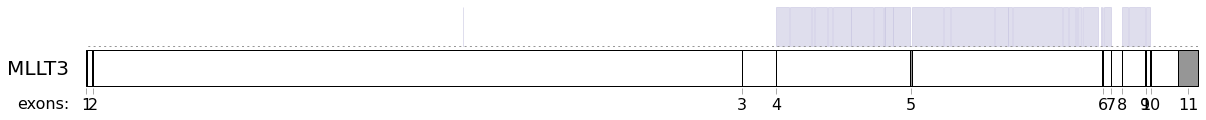

In [34]:
#MLLT3
print('plotting MLLT3 translocation breakpoint read depths')
MLLT3_chromosome = 'chr9'
MLLT3_start = 20341663
MLLT3_stop = 20622542
MLLT3_coordinates = {'Exon 1': ('exon', 20622244, 20622542),
                   'Intron 1-2': ('intron', 20620834, 20622243),
                   'Exon 2': ('exon', 20620653, 20620833),
                   'Intron 2-3': ('intron', 20456785, 20620652),
                   'Exon 3': ('exon', 20456702, 20456784),
                   'Intron 3-4': ('intron', 20448265, 20456701),
                   'Exon 4': ('exon', 20448121, 20448264),
                   'Intron 4-5': ('intron', 20414424, 20448120),
                   'Exon 5': ('exon', 20413719, 20414423),
                   'Intron 5-6': ('intron', 20365743, 20413718),
                   'Exon 6': ('exon', 20365667, 20365742),
                   'Intron 6-7': ('intron', 20363604, 20365666),
                   'Exon 7': ('exon', 20363474, 20363603),
                   'Intron 7-8': ('intron', 20360840, 20363473),
                   'Exon 8': ('exon', 20360740, 20360839),
                   'Intron 8-9': ('intron', 20354878, 20360739),
                   'Exon 9': ('exon', 20354806, 20354877),
                   'Intron 9-10': ('intron', 20353595, 20354805),
                   'Exon 10': ('exon', 20353523, 20353594),
                   'Intron 10-11': ('intron', 20346573, 20353522),
                   'Exon 11': ('exon', 20341663, 20346572)}

color = 'blue'

MLLT3_panel_positions = region_panel_positions_list(MLLT3_coordinates, panel_bed, MLLT3_chromosome, MLLT3_start, MLLT3_stop)
MLLT3_intron_exon_positions = region_ideogram(MLLT3_coordinates, color)
read_depths_plot('MLLT3', MLLT3_chromosome, MLLT3_start, MLLT3_stop, MLLT3_coordinates, panel_coverage, '-', color)

plotting KMT2A translocation breakpoint read depths


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


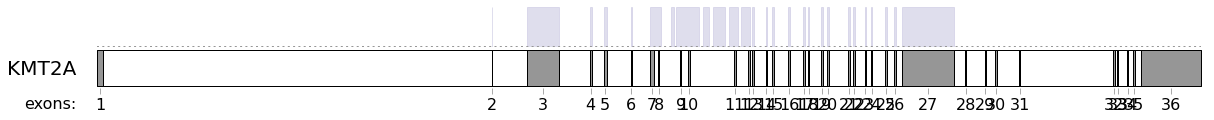

In [35]:
#KMT2A
print('plotting KMT2A translocation breakpoint read depths')
KMT2A_chromosome = 'chr11'
KMT2A_start = 118307205
KMT2A_stop = 118397539
KMT2A_coordinates = {'Exon 1': ('exon', 118307205, 118307659),
                   'Intron 1-2': ('intron', 118307660, 118339489),
                   'Exon 2': ('exon', 118339490, 118339559),
                   'Intron 2-3': ('intron', 118339560, 118342376),
                   'Exon 3': ('exon', 118342377, 118345030),
                   'Intron 3-4': ('intron', 118345031, 118347519),
                   'Exon 4': ('exon', 118347520, 118347697),
                   'Intron 4-5': ('intron', 118347698, 118348681),
                   'Exon 5': ('exon', 118348682, 118348916),
                   'Intron 5-6': ('intron', 118348917, 118350888),
                   'Exon 6': ('exon', 118350889, 118350953),
                   'Intron 6-7': ('intron', 118350954, 118352429),
                   'Exon 7': ('exon', 118352430, 118352807),
                   'Intron 7-8': ('intron', 118352808, 118353136),
                   'Exon 8': ('exon', 118353137, 118353210),
                   'Intron 8-9': ('intron', 118353211, 118354897),
                   'Exon 9': ('exon', 118354898, 118355029),
                   'Intron 9-10': ('intron', 118355030, 118355576),
                   'Exon 10': ('exon', 118355577, 118355690),
                   'Intron 10-11': ('intron', 118355691, 118359328),
                   'Exon 11': ('exon', 118359329, 118359475),
                  'Intron 11-12':('intron', 118359476, 118360506),
                  'Exon 12': ('exon', 118360507, 118360602),
                  'Intron 12-13': ('intron', 118360603, 118360843),
                  'Exon 13': ('exon', 118360844, 118360964),
                  'Intron 13-14': ('intron', 118360965, 118361910),
                  'Exon 14': ('exon', 118361911, 118362033),
                  'Intron 14-15': ('intron', 118362034, 118362458),
                  'Exon 15': ('exon', 118362459, 118362643),
                  'Intron 15-16': ('intron', 118362644, 118363771),
                  'Exon 16': ('exon', 118363772, 118363945),
                  'Intron 16-17': ('intron', 118363946, 118365002),
                  'Exon 17': ('exon', 118365003, 118365113),
                  'Intron 17-18': ('intron', 118365114, 118365408),
                  'Exon 18': ('exon', 118365409, 118365482),
                  'Intron 18-19': ('intron', 118365483, 118366414),
                  'Exon 19': ('exon', 118366415, 118366608),
                  'Intron 19-20': ('intron', 118366609, 118366975),
                  'Exon 20': ('exon', 118366976, 118367082),
                  'Intron 20-21': ('intron', 118367083, 118368650),
                  'Exon 21': ('exon', 118368651, 118368788),
                  'Intron 21-22': ('intron', 118368789, 118369084),
                  'Exon 22': ('exon', 118369085, 118369243),
                  'Intron 22-23': ('intron', 118369244, 118370017),
                  'Exon 23': ('exon', 118370018, 118370135),
                  'Intron 23-24': ('intron', 118370136, 118370549),
                  'Exon 24': ('exon', 118370550, 118370628),
                  'Intron 24-25': ('intron', 118370629, 118371701),
                  'Exon 25': ('exon', 118371702, 118371862),
                  'Intron 25-26': ('intron', 118371863, 118372386),
                  'Exon 26': ('exon', 118372387, 118372572),
                  'Intron 26-27': ('intron', 118372573, 118373112),
                  'Exon 27': ('exon', 118373113, 118377361),
                  'Intron 27-28': ('intron', 118377362, 118378243),
                  'Exon 28': ('exon', 118378244, 118378324),
                  'Intron 28-29': ('intron', 118378325, 118379850),
                  'Exon 29': ('exon', 118379851, 118379915),
                  'Intron 29-30': ('intron', 118379916, 118380662),
                  'Exon 30': ('exon', 118380663, 118380833),
                  'Intron 30-31': ('intron', 118380834, 118382665),
                  'Exon 31': ('exon', 118382666, 118382740),
                  'Intron 31-32': ('intron', 118382741, 118390332),
                  'Exon 32': ('exon', 118390333, 118390507),
                  'Intron 32-33': ('intron', 118390508, 118390671),
                  'Exon 33': ('exon', 118390672, 118390779),
                  'Intron 33-34': ('intron', 118390780, 118391516),
                  'Exon 34': ('exon', 118391517, 118391600),
                  'Intron 34-35': ('intron', 118391601, 118392002),
                  'Exon 35': ('exon', 118392003, 118392132),
                  'Intron 35-36': ('intron', 118392133, 118392611),
                  'Exon 36': ('exon', 118392612, 118397539)}

color = 'yellow'

KMT2A_panel_positions = region_panel_positions_list(KMT2A_coordinates, panel_bed, KMT2A_chromosome, KMT2A_start, KMT2A_stop)
KMT2A_intron_exon_positions = region_ideogram(KMT2A_coordinates, color)
read_depths_plot('KMT2A', KMT2A_chromosome, KMT2A_start, KMT2A_stop, KMT2A_coordinates, panel_coverage, '+', color)